In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("train.csv")

df = df.loc[df["Type"] == "SingleFamily"]
df = df[1:]


<AxesSubplot:>

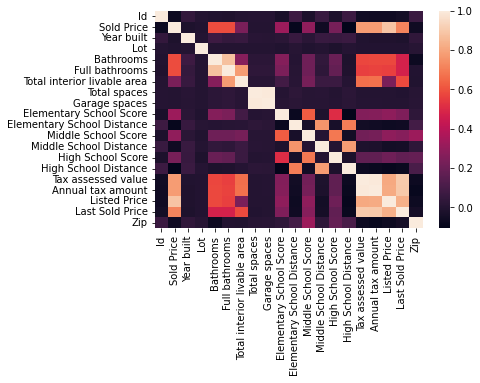

In [48]:
sns.heatmap(df.corr())

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31323 entries, 1 to 47438
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           31323 non-null  int64  
 1   Address                      31323 non-null  object 
 2   Sold Price                   31323 non-null  float64
 3   Summary                      31102 non-null  object 
 4   Type                         31323 non-null  object 
 5   Year built                   31135 non-null  float64
 6   Heating                      28146 non-null  object 
 7   Cooling                      25924 non-null  object 
 8   Parking                      30759 non-null  object 
 9   Lot                          30619 non-null  float64
 10  Bedrooms                     31284 non-null  object 
 11  Bathrooms                    30667 non-null  float64
 12  Full bathrooms               27858 non-null  float64
 13  Total interior l

In [50]:
df = df.drop(columns=["Id", "Address", "Sold Price", "Summary", "Type", "Full bathrooms", "Region",
                      "Garage spaces", "Elementary School", "Elementary School Distance",
                      "Middle School", "Middle School Distance", "High School",
                      "High School Distance", "Listed On",
                      "Last Sold On", "Last Sold Price", "City", "Zip", "State"])


In [51]:
first_dataset = df.dropna()
first_dataset

,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Total interior livable area,Total spaces,Elementary School Score,Middle School Score,High School Score,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Listed Price
10,1953.0,Forced Air,Central AC,"Garage, Garage - Attached, Covered",7570.0,4,2.0,1579.0,2.0,7.0,5.0,6.0,"Tile, Laminate","Forced air, Electric, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave...",In Garage,"Garage, Garage - Attached, Covered",1428000.0
18,1939.0,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached",6952.0,3,2.0,2100.0,0.0,6.0,6.0,8.0,"Hardwood, Marble","Forced air, Gas",Central,Refrigerator,"Gas Hookup, Inside","Garage, Garage - Attached",2390000.0
23,1952.0,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached",5000.0,3,2.0,1350.0,0.0,9.0,9.0,6.0,"Tile, Hardwood","Forced air, Gas",Central,"Garbage disposal, Range / Oven",In Garage,"Garage, Garage - Attached",1499000.0
26,1977.0,"Forced air, Gas","Refrigerator, Central","Garage, Garage - Detached, Off-street, Covered",6429.0,5,3.0,1910.0,2.0,8.0,5.0,6.0,"Tile, Laminate","Forced air, Gas","Refrigerator, Central","Dishwasher, Garbage disposal, Range / Oven, Re...",In Unit,"Garage, Garage - Detached, Off-street, Covered",1098000.0
27,2019.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",4476.0,"Master Bedroom on Ground Floor, Walk-in Closet",3.0,1797.0,1.0,6.0,6.0,8.0,"Tile, Marble, Laminate, Carpet, Stone","Forced air, Gas",Central,"Dishwasher, Microwave, Range / Oven, Refrigerator",Electricity Hookup (110V),"Garage, Garage - Attached, Covered",1998000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47403,1920.0,Floor Furnace,None,"Garage Door Opener, Detached",3049.2,2,1.0,1009.0,1.0,9.0,6.0,4.0,"Hardwood, Tile",Floor Furnace,None,"Gas Water Heater, Dishwasher, Disposal, Gas Ra...",Hookups Only,"Garage Door Opener, Detached",838000.0
47406,2002.0,"Natural Gas, Central, Fireplace Insert","Central Air, Zoned","Garage - Attached, Covered",7233.0,4,2.0,1731.0,3.0,5.0,4.0,7.0,"Wood, Vinyl","Other, Electric, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave...","cabinets, Inside Area","Garage - Attached, Covered",439000.0
47408,1960.0,Forced air,Other,"Garage, Garage - Detached, Off-street, Covered",9491.0,3,2.0,1080.0,2.0,9.0,9.0,9.0,Hardwood,Forced air,Other,"Dryer, Washer",In Unit,"Garage, Garage - Detached, Off-street, Covered",875000.0
47427,1964.0,High Efficiency,"High Efficiency, SEER Rated 16+","Garage, Garage - Attached, Covered",20037.6,4,5.0,4680.0,6.0,7.0,5.0,7.0,"Carpet, Hardwood","Forced air, Gas",Central,"Garbage disposal, Range / Oven, Refrigerator","Individual Room, Inside, Washer Hookup, Gas & ...","Garage, Garage - Attached, Covered",2569000.0


<AxesSubplot:>

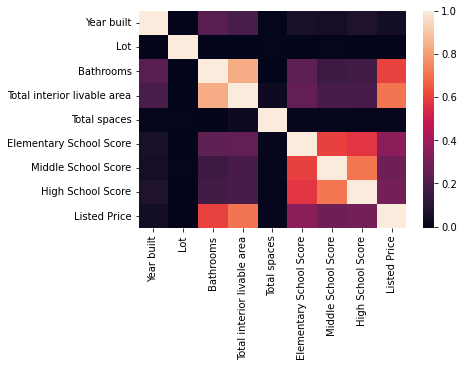

In [52]:
sns.heatmap(first_dataset.corr())

In [4]:
first_dataset.dtypes

Id                               int64
Address                         object
Sold Price                     float64
Summary                         object
Type                            object
Year built                     float64
Heating                         object
Cooling                         object
Parking                         object
Lot                            float64
Bedrooms                        object
Bathrooms                      float64
Full bathrooms                 float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance     float64
Middle School                   object
Middle School Score            float64
Middle School Distance         float64
High School                     object
High School Score              float64
High School Distance     

# Unique Info

In [5]:
for obj in first_dataset.select_dtypes(include="object"):
    print(f"{obj}: {len(first_dataset[obj].unique())}")

Address: 5140
Summary: 5133
Type: 1
Heating: 410
Cooling: 131
Parking: 654
Bedrooms: 158
Region: 210
Elementary School: 600
Middle School: 287
High School: 253
Flooring: 418
Heating features: 260
Cooling features: 76
Appliances included: 870
Laundry features: 622
Parking features: 648
Listed On: 651
Last Sold On: 3162
City: 218
State: 2


In [10]:
rooms =  first_dataset[["Bedrooms","Bathrooms"]]
rooms 

,Bedrooms,Bathrooms
18,3,2.0
23,3,2.0
39,"Ground Floor Bedroom, Master Bedroom on Ground...",2.0
54,3,1.0
76,3,2.0
...,...,...
47402,4,4.0
47406,4,2.0
47408,3,2.0
47427,4,5.0


In [9]:
school_scores = first_dataset[["Elementary School Score", "Middle School Score", "High School Score"]]
school_scores

,Elementary School Score,Middle School Score,High School Score
18,6.0,6.0,8.0
23,9.0,9.0,6.0
39,5.0,6.0,7.0
54,5.0,8.0,7.0
76,5.0,5.0,7.0
...,...,...,...
47402,5.0,2.0,6.0
47406,5.0,4.0,7.0
47408,9.0,9.0,9.0
47427,7.0,5.0,7.0


In [8]:
df["Appliances included"].unique()

array(['Dishwasher, Dryer, Garbage disposal, Microwave, Refrigerator, Washer',
       nan, 'Dishwasher', ...,
       'Dishwasher, Disposal, Refrigerator, Water Heater, Water Softener',
       'Oven, None',
       'Dryer, Washer, Gas Water Heater, Dishwasher, Disposal, Gas Range, Plumbed For Ice Maker, Microwave, Refrigerator, Self Cleaning Oven'],
      dtype=object)

In [15]:
listed_prices = first_dataset["Listed Price"]
listed_prices

18       2390000.0
23       1499000.0
39       1298000.0
54       1425000.0
76        888000.0
           ...    
47402    1025000.0
47406     439000.0
47408     875000.0
47427    2569000.0
47436    2295000.0
Name: Listed Price, Length: 5140, dtype: float64

In [16]:
test_df = pd.concat([rooms, school_scores, listed_prices], axis=1, join="inner")
test_df

,Bedrooms,Bathrooms,Elementary School Score,Middle School Score,High School Score,Listed Price
18,3,2.0,6.0,6.0,8.0,2390000.0
23,3,2.0,9.0,9.0,6.0,1499000.0
39,"Ground Floor Bedroom, Master Bedroom on Ground...",2.0,5.0,6.0,7.0,1298000.0
54,3,1.0,5.0,8.0,7.0,1425000.0
76,3,2.0,5.0,5.0,7.0,888000.0
...,...,...,...,...,...,...
47402,4,4.0,5.0,2.0,6.0,1025000.0
47406,4,2.0,5.0,4.0,7.0,439000.0
47408,3,2.0,9.0,9.0,9.0,875000.0
47427,4,5.0,7.0,5.0,7.0,2569000.0


In [25]:
test_df["Bedrooms"].unique()

array(['3',
       'Ground Floor Bedroom, Master Bedroom on Ground Floor, Master Suite / Retreat, Walk-in Closet',
       '6',
       'Ground Floor Bedroom, Master Suite / Retreat, Walk-in Closet',
       'Ground Floor Bedroom, More than One Bedroom on Ground Floor', '4',
       'Master Bedroom on Ground Floor', '5',
       'Ground Floor Bedroom, Master Bedroom on Ground Floor', '2',
       'Ground Floor Bedroom, Walk-in Closet, More than One Master Bedroom',
       'Ground Floor Bedroom, Master Bedroom on Ground Floor, Walk-in Closet',
       'Ground Floor Bedroom, Walk-in Closet', 'Master Suite / Retreat',
       'Master Suite / Retreat, Walk-in Closet', 'Walk-in Closet',
       'Master Bedroom on Ground Floor, Master Suite / Retreat, More than One Bedroom on Ground Floor, Walk-in Closet',
       'More than One Bedroom on Ground Floor',
       'Ground Floor Bedroom, Master Bedroom on Ground Floor, Master Suite / Retreat, More than One Master Bedroom',
       'Master Bedroom on Ground

In [19]:
test_df["Bathrooms"].unique()

array([ 2.,  1.,  3.,  5.,  4.,  6., 11.,  7.,  8., 10., 12.,  0.,  9.])

In [26]:

count = 0
for row in test_df["Bedrooms"]:
    if row.isnumeric():
        count += 1
        print(row)

    #rooms_count = row.count("room")
    #print(rooms_count)
    #print(len(row.split(', ')))
    

3
3
3
3
6
4
5
3
3
4
2
2
5
3
2
3
5
3
3
3
4
4
4
3
3
3
3
4
3
4
4
2
4
1
4
3
3
3
3
5
4
4
3
2
4
2
4
4
3
2
9
3
3
3
4
3
4
3
3
4
3
5
4
4
5
5
3
3
4
3
3
4
2
4
3
4
3
3
4
3
4
5
4
2
2
4
3
3
3
3
3
4
5
3
4
2
2
3
3
3
4
4
3
3
4
2
2
5
2
2
4
2
3
3
3
4
2
3
5
4
3
2
3
3
3
3
3
2
4
3
3
3
4
3
5
4
4
4
4
3
2
3
3
2
5
5
3
2
3
3
4
4
1
3
4
3
4
4
2
4
2
2
3
3
3
2
5
5
3
3
4
3
2
3
3
5
4
2
3
3
3
3
2
3
3
4
3
5
5
3
3
4
3
3
3
3
4
4
4
3
3
3
4
5
3
2
3
3
2
5
3
3
2
3
3
2
4
3
3
3
4
4
3
3
2
3
3
3
3
3
3
2
4
3
2
2
2
7
3
3
4
3
2
3
4
4
5
4
3
5
4
4
3
1
5
5
3
4
3
3
3
6
4
3
2
2
3
3
5
3
3
3
3
3
3
3
4
3
2
3
4
2
2
4
1
4
2
3
4
3
3
4
4
4
3
3
4
3
2
3
4
3
2
4
2
3
4
4
5
4
3
3
3
4
3
4
2
3
4
3
3
3
3
3
2
3
5
2
3
3
2
3
2
4
4
2
4
3
5
4
4
4
5
5
2
4
4
3
3
4
3
3
4
3
4
3
3
4
2
5
4
5
3
5
3
2
5
3
3
3
3
3
3
3
6
3
4
4
3
4
2
4
4
2
5
3
4
5
5
3
5
4
5
3
5
3
2
3
3
3
3
2
3
3
1
3
6
2
3
4
2
2
3
3
5
4
2
4
3
3
4
3
3
2
3
2
4
4
5
2
3
4
5
2
4
3
4
3
4
4
4
3
2
4
4
3
3
3
2
2
4
3
4
4
3
3
3
3
3
4
3
2
4
3
3
2
3
3
2
3
6
5
3
4
2
4
3
4
3
3
3
3
4
3
4
3
4
2
5
3
5
4
6
4
3
2
5
3
2
4


In [44]:
#drop_nonnumric = test_df[test_df.drop]
numeric_room = test_df[test_df["Bedrooms"].str.isnumeric()]
numeric_room["Bedrooms"] = numeric_room["Bedrooms"].astype(float)
numeric_room

C:\Users\nasis\AppData\Local\Temp\ipykernel_8696\2555152370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_room["Bedrooms"] = numeric_room["Bedrooms"].astype(float)


,Bedrooms,Bathrooms,Elementary School Score,Middle School Score,High School Score,Listed Price
18,3.0,2.0,6.0,6.0,8.0,2390000.0
23,3.0,2.0,9.0,9.0,6.0,1499000.0
54,3.0,1.0,5.0,8.0,7.0,1425000.0
76,3.0,2.0,5.0,5.0,7.0,888000.0
81,6.0,2.0,7.0,6.0,7.0,1099950.0
...,...,...,...,...,...,...
47402,4.0,4.0,5.0,2.0,6.0,1025000.0
47406,4.0,2.0,5.0,4.0,7.0,439000.0
47408,3.0,2.0,9.0,9.0,9.0,875000.0
47427,4.0,5.0,7.0,5.0,7.0,2569000.0


<AxesSubplot:>

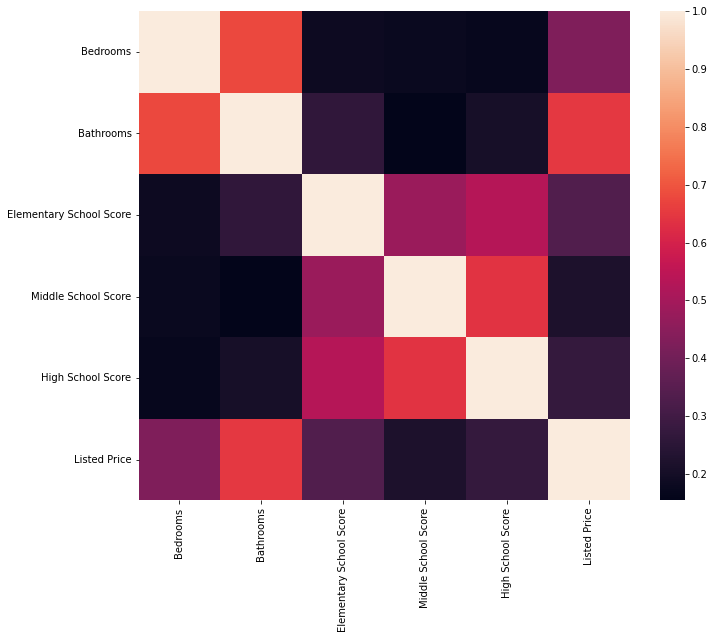

In [45]:
corr = numeric_room.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr)


In [42]:
numeric_room.dtypes

Bedrooms                    object
Bathrooms                  float64
Elementary School Score    float64
Middle School Score        float64
High School Score          float64
Listed Price               float64
dtype: object